# MINERÍA DE TEXTOS

## Alumna: Jessica Sarahi Méndez Rincón


###  Proyecto Analisis de Sentimientos y Polaridad en Tweets
###  Tema: COVID-19

## Contexto:
    
    El año 2020 se vio afectado por el impacto a la sociedad mundial sobre una gripe de alto nivel de contagio así como la causa principal de fallecimientos alrededor del Mundo.
    
    México no ha sido exento del raro virus.
    
    Con el presente Proyecto, el objetivo primordial es desarrollar los algoritmos que ayuden a monitorizar el efecto en los comentarios que en la Red Social de Twitter se emiten, y que ayudé a dar una idea del estado de ánimo de la gente.

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQUpnfdhCKN1C3OIbNrDdyjctlRsA9t6386WWD8JkUzt_X7JiuH&usqp=CAU" alt="Alt text that describes the graphic" title="Title text" />

In [1]:
# Importacion de librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#Tienes que descargarte las stopwords primero via nltk.download()
import nltk
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.corpus import wordnet as wn
from nltk import word_tokenize
from nltk.data import load
from nltk.stem import SnowballStemmer 
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from string import punctuation
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict 
from sklearn import model_selection, naive_bayes, svm
import seaborn as sns
import matplotlib.pyplot as plt  


In [2]:
non_words = list(punctuation)
non_words.extend(['¿', '¡'])
non_words.extend(map(str,range(10)))


# WordCount

In [3]:
names = ['Id', 'tweet', 'polaridad']
palabras = pd.read_csv('train.txt', sep='\t',names=names)

In [4]:
palabras['tweet2'] = palabras.tweet.str.strip().str.split('[\W_]+')

In [5]:
rows = list()
for row in palabras[['tweet2']].iterrows():
    r = row[1]
    for word in r.tweet2:
        rows.append((word))

tweet2 = pd.DataFrame(rows, columns=['tweet2'])
tweet2.head()

,tweet2
0,No
1,mames
2,este
3,pinche
4,dolor


In [6]:
tweet2 = tweet2[tweet2.tweet2.str.len() > 0]
tweet2['tweet2'] = tweet2.tweet2.str.lower()
tweet2.head()

,tweet2
0,no
1,mames
2,este
3,pinche
4,dolor


In [7]:
counts = tweet2\
    .tweet2.value_counts()\
    .to_frame()\
    .rename(columns={'tweet2':'n_w'})
counts.head(15)

,n_w
que,607
de,581
y,474
no,430
a,371
la,353
me,338
en,257
el,244
es,225


In [8]:
stopwords = stopwords.words('spanish')

In [9]:
for a_stopword in stopwords:
    if a_stopword in counts.index:
        counts = counts.drop(a_stopword)

In [10]:
counts.head(20)

,n_w
si,127
año,63
quiero,50
mejor,50
bien,49
tan,47
días,42
así,40
vida,40
hoy,40


In [11]:
top_500 = counts.head(500) 

In [12]:
top_20 = counts.head(20)
top_20

,n_w
si,127
año,63
quiero,50
mejor,50
bien,49
tan,47
días,42
así,40
vida,40
hoy,40


In [13]:
top_20['palabras'] = counts.head(20)
top_20

c:\users\jess\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,n_w,palabras
si,127,127
año,63,63
quiero,50,50
mejor,50,50
bien,49,49
tan,47,47
días,42,42
así,40,40
vida,40,40
hoy,40,40


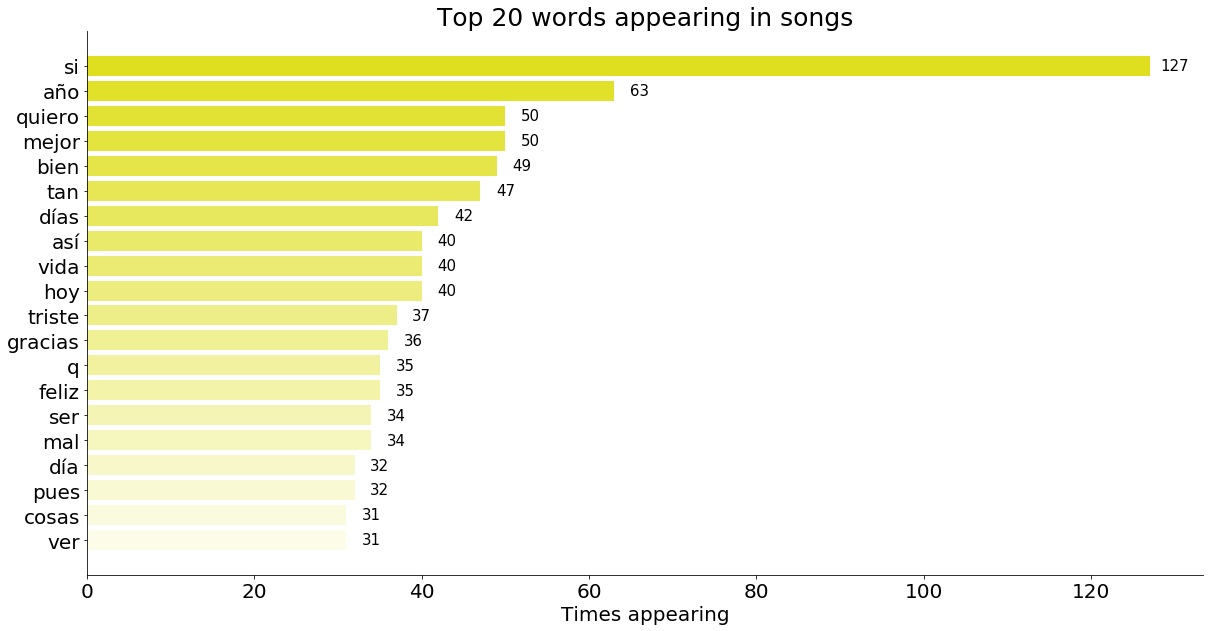

In [14]:
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.barplot(x="n_w", y=top_20.index, data=top_20, palette=sns.light_palette("yellow", n_colors=20, reverse=True))
plt.ylabel("")
plt.xlabel('Times appearing', fontsize=20)
plt.title('Top 20 words appearing in songs', fontsize=25)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(20) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(20)
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 3  ,
            p.get_y() + p.get_height()/1.4,
            "%d" % width,
            ha="center", fontsize=15)
sns.despine()
plt.savefig('palabras_populares.jpg')
plt.plot();

In [15]:
top_five_words = counts.head(5).index
top_five_words

Index(['si', 'año', 'quiero', 'mejor', 'bien'], dtype='object')

In [16]:
pip install wordcloud
#conda install -c conda-forge wordcloud

In [17]:
import re
from PIL import Image
from wordcloud import WordCloud
from collections import Counter

In [18]:
comment_words = ' '
for val in counts.index:       
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  

In [19]:
 trump_mask = np.array(Image.open("heart.jpg"))

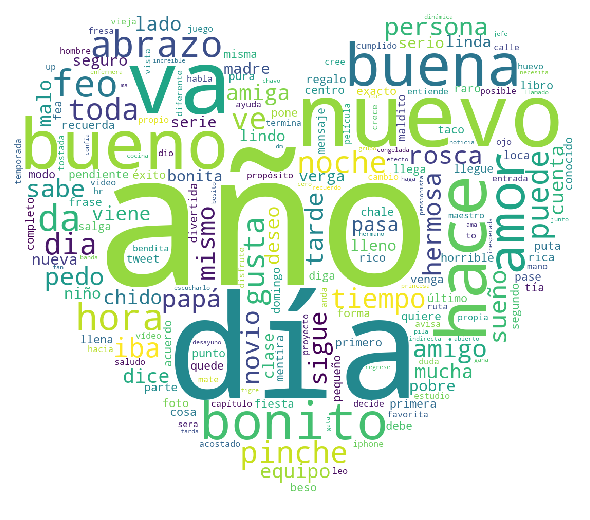

In [20]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                mask=trump_mask,
                min_font_size = 10).generate(comment_words)  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 